In [1]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)                                       # Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)
                                                                                # This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns

mh = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/survey.csv")   

# Load in the dataset as mh

In [5]:
mh.head()
mh.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [6]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(mh)
profile.to_file(outputfile="myoutputfile.html") 

In [9]:
mh.count()

Timestamp                    1259
Age                          1259
Gender                       1259
Country                      1259
state                         744
self_employed                1241
family_history               1259
treatment                    1259
work_interfere                995
no_employees                 1259
remote_work                  1259
tech_company                 1259
benefits                     1259
care_options                 1259
wellness_program             1259
seek_help                    1259
anonymity                    1259
leave                        1259
mental_health_consequence    1259
phys_health_consequence      1259
coworkers                    1259
supervisor                   1259
mental_health_interview      1259
phys_health_interview        1259
mental_vs_physical           1259
obs_consequence              1259
comments                      164
dtype: int64

In [10]:
print("How many values are NaN?: ", pd.isnull(mh['Age']).sum())

How many values are NaN?:  0


In [14]:

a=mh.Age[mh.Age>123]
a


364            329
390    99999999999
Name: Age, dtype: int64

In [15]:
mh.columns = map(str.lower, mh.columns)                                  # map() function returns a list of results after applying the given function
                                                                         # to each item of a given iterable.
mh.dtypes   

timestamp                    object
age                           int64
gender                       object
country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [16]:
mh['timestamp'] = pd.to_datetime(mh['timestamp'])                        # Convert "timestamp" data type from object to datetime                      
mh.dtypes  

timestamp                    datetime64[ns]
age                                   int64
gender                               object
country                              object
state                                object
self_employed                        object
family_history                       object
treatment                            object
work_interfere                       object
no_employees                         object
remote_work                          object
tech_company                         object
benefits                             object
care_options                         object
wellness_program                     object
seek_help                            object
anonymity                            object
leave                                object
mental_health_consequence            object
phys_health_consequence              object
coworkers                            object
supervisor                           object
mental_health_interview         

In [20]:
total = mh.isnull().sum().sort_values(ascending=False)
percent = (mh.isnull().sum()/mh.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#missing_data.head(20)
print(missing_data)

                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
benefits                       0  0.000000
age                            0  0.000000
gender                         0  0.000000
country                        0  0.000000
family_history                 0  0.000000
treatment                      0  0.000000
no_employees                   0  0.000000
remote_work                    0  0.000000
tech_company                   0  0.000000
care_options                   0  0.000000
obs_consequence                0  0.000000
wellness_program               0  0.000000
seek_help                      0  0.000000
anonymity                      0  0.000000
leave                          0  0.000000
mental_health_consequence      0  0.000000
phys_health_consequence        0  0.000000
coworkers                      0  0.000000
supervisor 

In [21]:
mh = mh.drop(['comments'], axis= 1)
mh = mh.drop(['timestamp'], axis= 1)

mh.head(5)

,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [29]:
def clean_age(age):                                                     # Create a new column "age_clean" that replaces out-of-range ages with "NaN"
    if age>=0 and age<=123:                                             # The oldest living person on record lived to be 122 years, 164 days (Jeanne Calment, 1875-1997)
        return age
    else:
        return np.nan
mh['age_clean'] = mh['age'].apply(clean_age)

print("'Age'")                                                          # Check out the new column and make sure it looks right
print("Minimum value: ", mh["age_clean"].min())
print("Maximum value: ", mh["age_clean"].max())
print("How many values are NaN?: ", pd.isnull(mh['age_clean']).sum())
print("Frequency table for age_clean:")
mh["age_clean"].value_counts().sort_index(0)

'Age'
Minimum value:  5.0
Maximum value:  72.0
How many values are NaN?:  5
Frequency table for age_clean:


5.0      1
8.0      1
11.0     1
18.0     7
19.0     9
20.0     6
21.0    16
22.0    21
23.0    51
24.0    46
25.0    61
26.0    75
27.0    71
28.0    68
29.0    85
30.0    63
31.0    67
32.0    82
33.0    70
34.0    65
35.0    55
36.0    37
37.0    43
38.0    39
39.0    33
40.0    33
41.0    21
42.0    20
43.0    28
44.0    11
45.0    12
46.0    12
47.0     2
48.0     6
49.0     4
50.0     6
51.0     5
53.0     1
54.0     3
55.0     3
56.0     4
57.0     3
58.0     1
60.0     2
61.0     1
62.0     1
65.0     1
72.0     1
Name: age_clean, dtype: int64

In [37]:
age_Group = pd.cut(mh['age_clean'].dropna(),
                         [0,18,25,35,45,99],
                         labels=['<18','18-24','25-34','35-44','45+'], include_lowest=True)
print(age_Group)

0       35-44
1       35-44
2       25-34
3       25-34
4       25-34
5       25-34
6       25-34
7       35-44
8       35-44
9       18-24
10      25-34
11      25-34
12      35-44
13      35-44
14      25-34
15      25-34
16      18-24
17      25-34
18        45+
19      35-44
20      25-34
21      25-34
22        45+
23      35-44
24      25-34
25      25-34
26      25-34
27      25-34
28      25-34
29      35-44
        ...  
1229    35-44
1230    18-24
1231    18-24
1232    18-24
1233    18-24
1234    18-24
1235    18-24
1236      45+
1237    25-34
1238    25-34
1239    25-34
1240    25-34
1241    25-34
1242    25-34
1243    35-44
1244    25-34
1245    18-24
1246    25-34
1247    35-44
1248    35-44
1249    25-34
1250    25-34
1251    35-44
1252    25-34
1253    35-44
1254    25-34
1255    25-34
1256    25-34
1257      45+
1258    18-24
Name: age_clean, Length: 1254, dtype: category
Categories (5, object): [<18 < 18-24 < 25-34 < 35-44 < 45+]


Text(0.5, 1.0, 'Age Group vs Treatment')

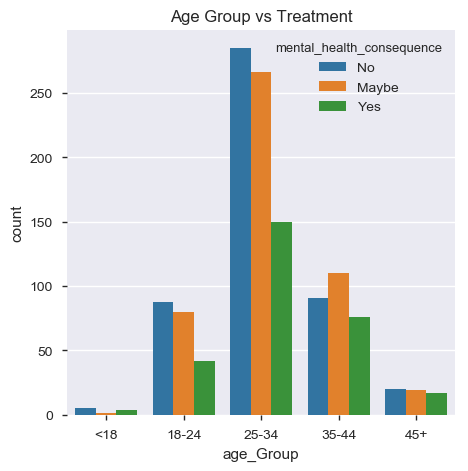

In [42]:
fig,ax =plt.subplots(figsize=(5,5))
sns.countplot(data = mh,x = 'age_Group', hue='mental_health_consequence')
plt.title('Age Group vs Treatment')

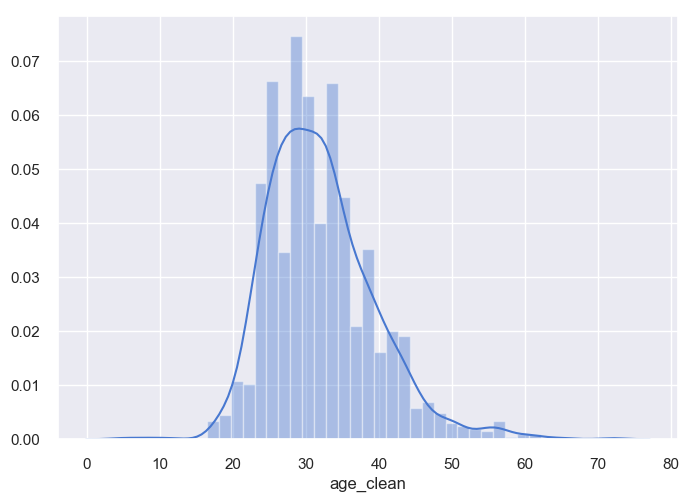

In [43]:
sns.set(color_codes=True)                                                # Plot a histogram of the respondents' ages (remove any NaN values)
sns.set_palette(sns.color_palette("muted"))

sns.distplot(mh["age_clean"].dropna());

In [49]:
mh['self_employed'].mode()

0    No
dtype: object

In [50]:
mh['self_employed'] = mh['self_employed'].fillna(mh['self_employed'].mode()[0])
print(mh['self_employed'].unique())

['No' 'Yes']


In [51]:
mh['work_interfere'] = mh['work_interfere'].fillna(mh['work_interfere'].mode()[0])
print(mh['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes']


In [52]:
print(mh['gender'].unique())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [64]:
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female", "cis-female/femme", "female (cis)", "femail", "Female"]
gender = mh['gender'].str.lower()
#print(gender)

#Select unique elements
gender = mh['gender'].unique()

for (row, col) in mh.iterrows():

    if str.lower(col.gender) in male_str:
        mh['gender'].replace(to_replace=col.gender, value='male', inplace=True)

    if str.lower(col.gender) in female_str:
        mh['gender'].replace(to_replace=col.gender, value='female', inplace=True)

    if str.lower(col.gender) in trans_str:
        mh['gender'].replace(to_replace=col.gender, value='trans', inplace=True)

#Get rid of bullshit
stk_list = ['A little about you', 'p']
mh = mh[~mh['gender'].isin(stk_list)]

print(mh['gender'].unique())

['female' 'male' 'trans' 'Female ']


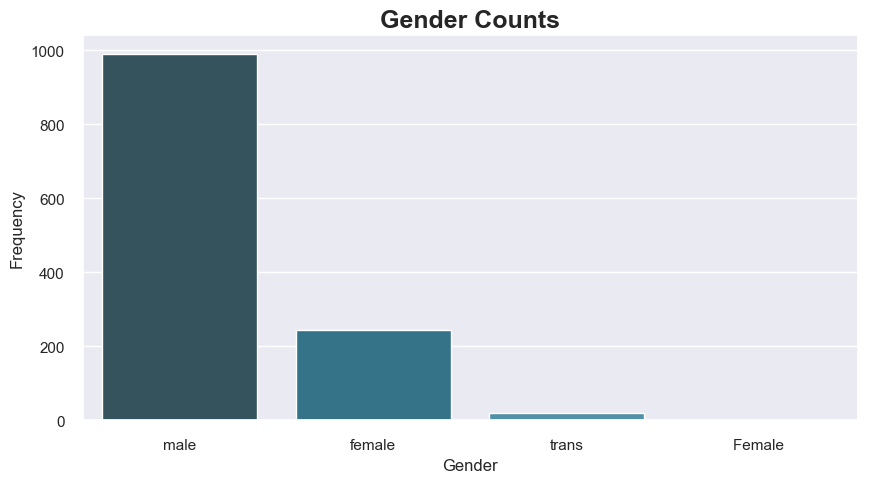

In [65]:
plt.figure(figsize=(10,5))
sns.countplot('gender',data = mh, order = mh['gender'].value_counts().index,palette="PuBuGn_d")
plt.title("Gender Counts",fontsize=18,fontweight="bold")
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'treatment (trans)')

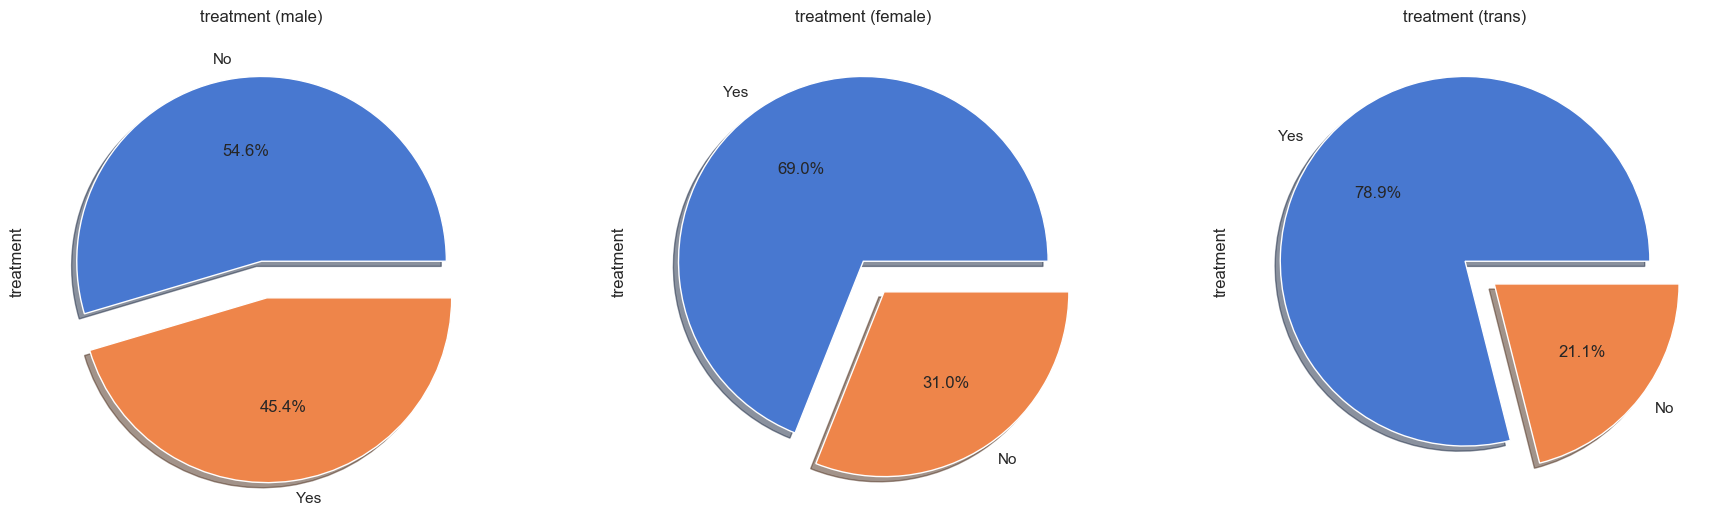

In [69]:
f,ax = plt.subplots(1,3,figsize=(22,6))
mh['treatment'][mh['gender'] == 'male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
mh['treatment'][mh['gender'] == 'female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
mh['treatment'][mh['gender'] == 'trans'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('treatment (male)')
ax[1].set_title('treatment (female)')
ax[2].set_title('treatment (trans)')

In [70]:
post_profile = pandas_profiling.ProfileReport(mh)
post_profile.to_file(outputfile="post_profiling.html")

In [72]:
mh_new = mh.copy(deep=True)   

In [73]:
from sklearn.preprocessing import LabelEncoder                                    # Label encoder is used to transform non-numerical labels to numerical labels.
number = LabelEncoder()                                                           # Here as our data set consists only of categorical values except age
for i in mh_new.columns:                                                          # in order to find the correlation between variables, we do Label encoding 
    mh_new[i] = number.fit_transform(mh_new[i].astype('str'))

In [74]:
mh_new.head()

,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_clean,age_Group
0,23,1,44,10,0,0,1,1,4,0,1,2,1,1,2,2,2,1,1,1,2,1,0,2,0,20,2
1,30,2,44,11,0,0,0,2,5,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,27,2
2,17,2,6,45,0,0,0,2,4,0,1,1,0,1,1,0,1,1,1,2,2,2,2,1,0,15,1
3,16,2,43,45,0,1,1,1,2,0,1,1,2,1,1,1,1,2,2,1,0,0,0,1,1,14,1
4,16,2,44,37,0,0,0,0,1,1,1,2,0,0,0,0,0,1,1,1,2,2,2,0,0,14,1


In [75]:
corr=mh_new.corr()['treatment']
corr[np.argsort(corr,axis=0)[::-1]]

treatment                    1.000000
family_history               0.376714
care_options                 0.235135
benefits                     0.224767
obs_consequence              0.154008
anonymity                    0.140905
work_interfere               0.136273
mental_health_interview      0.094859
wellness_program             0.092346
seek_help                    0.087700
country                      0.080096
age_clean                    0.076312
age                          0.074897
coworkers                    0.066022
mental_vs_physical           0.060552
leave                        0.059034
age_Group                    0.051030
phys_health_interview        0.049234
mental_health_consequence    0.027943
remote_work                  0.024593
self_employed                0.016264
phys_health_consequence     -0.012776
tech_company                -0.032295
supervisor                  -0.037944
no_employees                -0.047733
state                       -0.099801
gender      

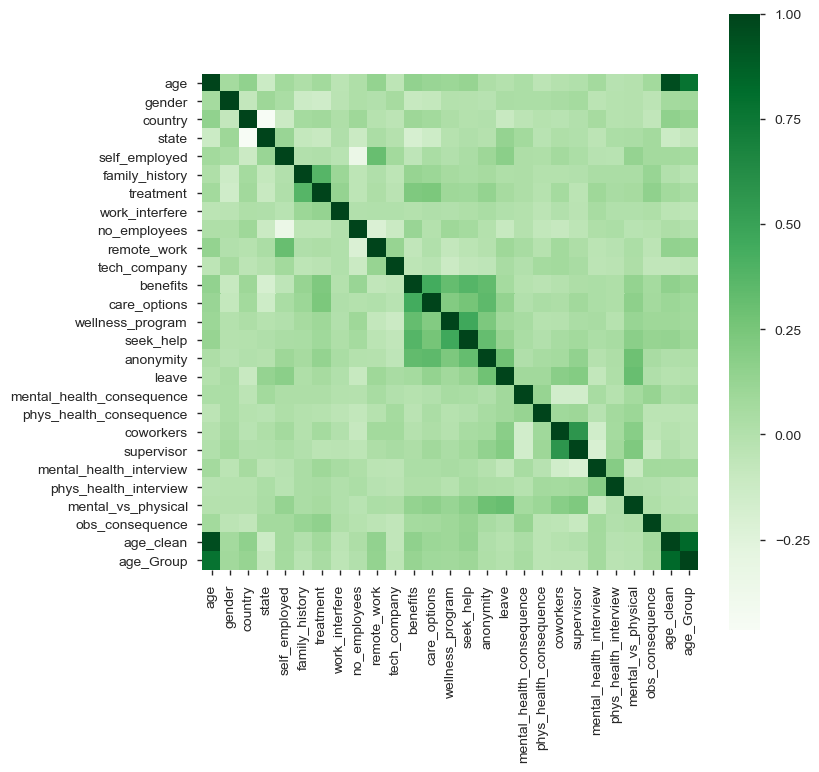

In [85]:
features_correlation = mh_new.corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Greens')
plt.show()

Text(0.5, 1.0, 'work_interfere (Sometimes)')

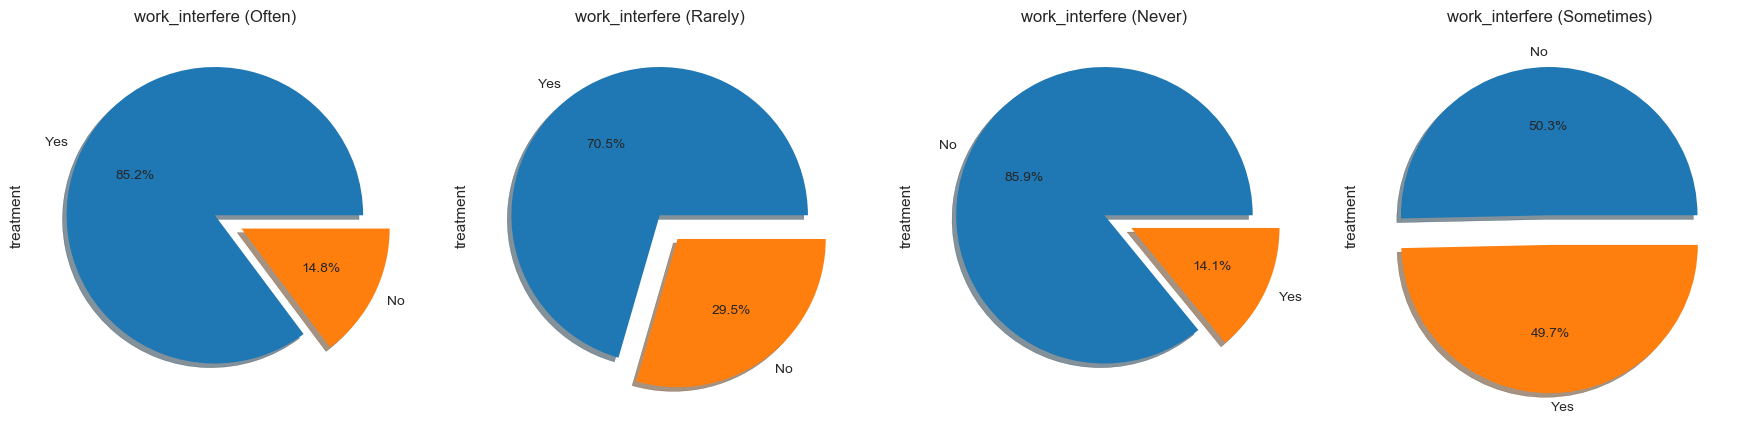

In [83]:
f,ax = plt.subplots(1,4,figsize=(22,7))
mh['treatment'][mh['work_interfere'] == 'Often'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
mh['treatment'][mh['work_interfere'] == 'Rarely'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
mh['treatment'][mh['work_interfere'] == 'Never'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True)
mh['treatment'][mh['work_interfere'] == 'Sometimes'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[3],shadow=True)
ax[0].set_title('work_interfere (Often)')
ax[1].set_title('work_interfere (Rarely)')
ax[2].set_title('work_interfere (Never)')
ax[3].set_title('work_interfere (Sometimes)')

In [86]:
df = pd.DataFrame({'treatment': mh['treatment'], 'work_interfere': mh['work_interfere']}, dtype='category')         # Create a new dataframe with the two columns and assign numbers in place of their categories
df_num = df.apply(lambda x: x.cat.codes)

print("Pearson:", df_num.corr())                                                                                    # Run a correlation calculation 
print("")

Pearson:                 treatment  work_interfere
treatment        1.000000        0.136273
work_interfere   0.136273        1.000000



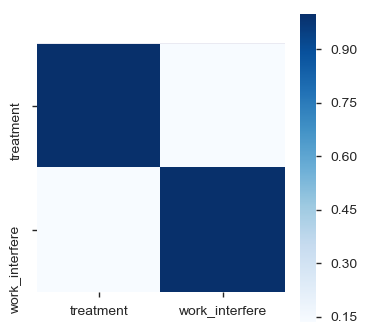

In [87]:
features = df_num.corr()
plt.figure(figsize=(4,4))
sns.heatmap(features,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

Text(0.5, 1.0, 'Age Category Vs. Seeking Treatment')

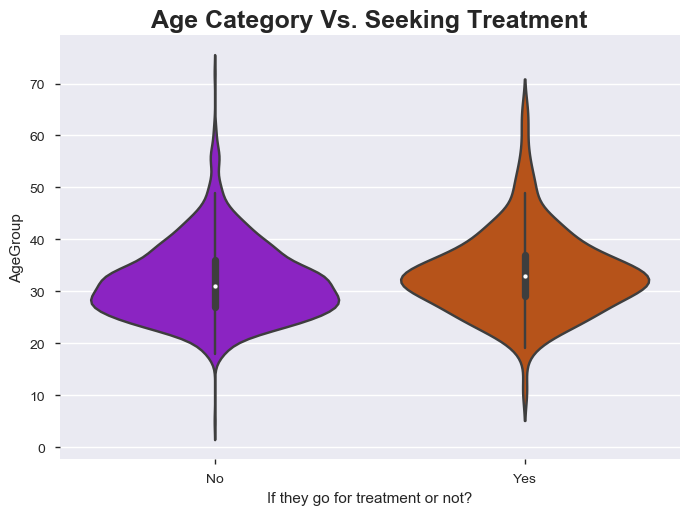

In [88]:
ax = sns.violinplot(x="self_employed", y="age_clean", palette="gnuplot", data=mh)
plt.xlabel("If they go for treatment or not?")
plt.ylabel("AgeGroup")
plt.title("Age Category Vs. Seeking Treatment", fontsize=18, fontweight = "bold")

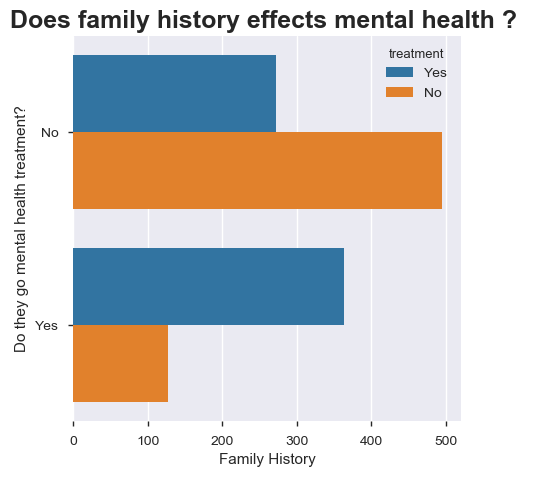

In [90]:
plt.figure(figsize=(5,5))
sns.countplot(y="family_history", hue="treatment", data=mh)
plt.title("Does family history effects mental health ? ",fontsize=18,fontweight="bold")
plt.ylabel("Do they go mental health treatment?")
plt.xlabel("Family History")
plt.show()

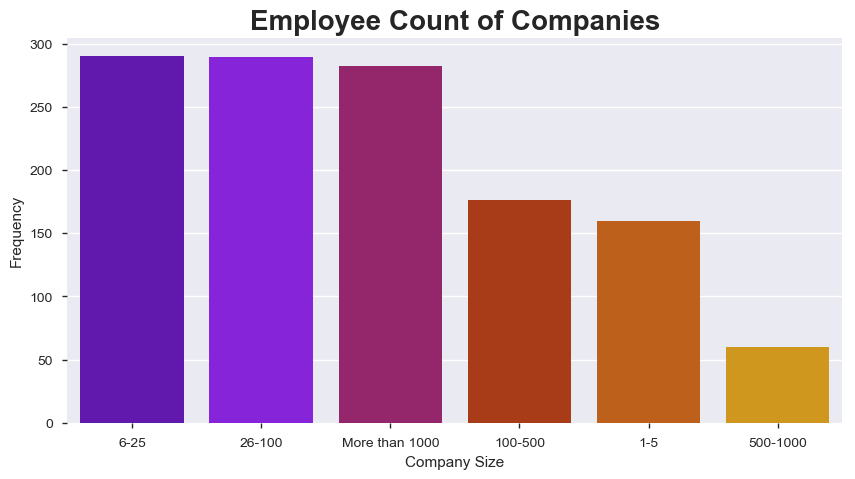

In [91]:
plt.figure(figsize=(10,5))
sns.countplot('no_employees',data = mh, order = mh['no_employees'].value_counts().index,palette="gnuplot")
plt.title("Employee Count of Companies",fontsize=20,fontweight="bold")
plt.ylabel("Frequency")
plt.xlabel("Company Size")
plt.show()


Text(0, 0.5, 'Count')

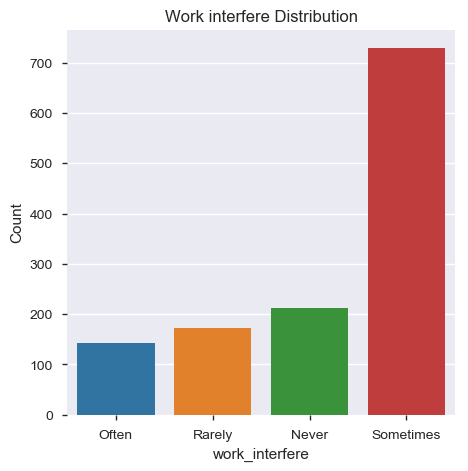

In [93]:
fig,ax  =plt.subplots(figsize=(5,5))
sns.countplot(mh['work_interfere'].dropna(),ax=ax)
plt.title('Work interfere Distribution')
plt.ylabel('Count')

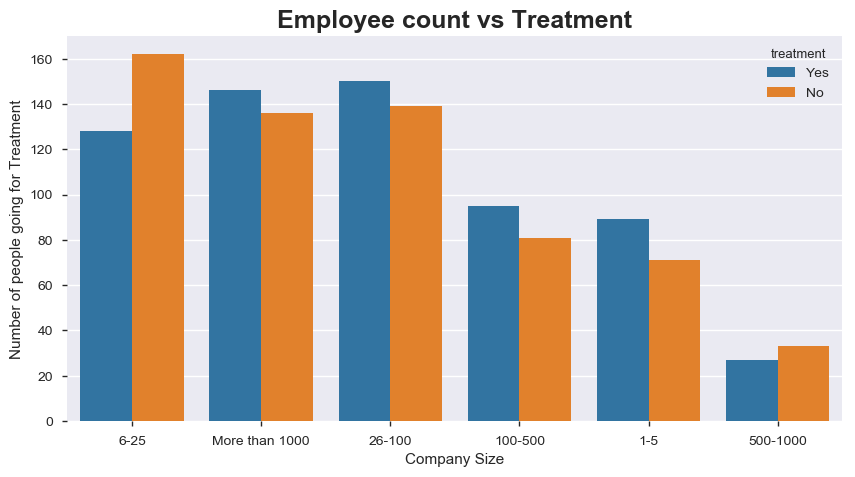

In [94]:
plt.figure(figsize=(10,5))
sns.countplot("no_employees", hue="treatment", data=mh)
plt.title("Employee count vs Treatment",fontsize=18,fontweight="bold")
plt.ylabel("Number of people going for Treatment")
plt.xlabel("Company Size")
plt.show()

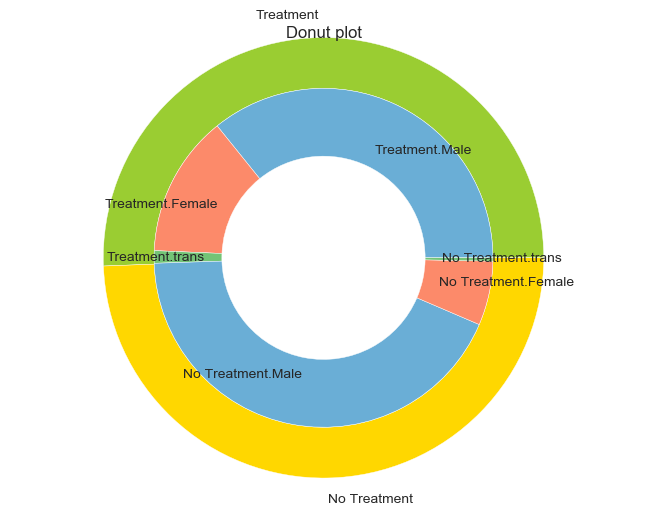

In [95]:
group_names=['Treatment', 'No Treatment']
group_size=[637,622]
subgroup_names=['Treatment.Male','Treatment.Female','Treatment.trans','No Treatment.Male','No Treatment.Female','No Treatment.trans']
subgroup_size=[450,170,15,541,77,4]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors = ['yellowgreen', 'gold'])
plt.setp( mypie, width=0.3, edgecolor='white')

# wedges, texts, autotexts = ax.pie(group_size, autopct=lambda pct: func(pct, data),
                                  #textprops=dict(color="w"))
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), b(0.4), c(0.5), a(0.5), b(0.4), c(0.5)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
plt.title('Donut plot')
# show it
plt.show()

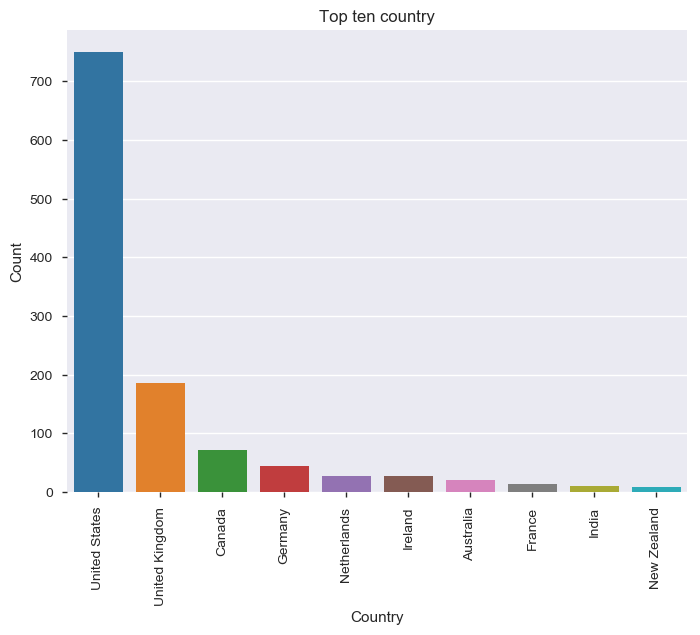

In [96]:
from collections import Counter
country_count = Counter(mh['country'].dropna().tolist()).most_common(10)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('Top ten country')
plt.xlabel('Country')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

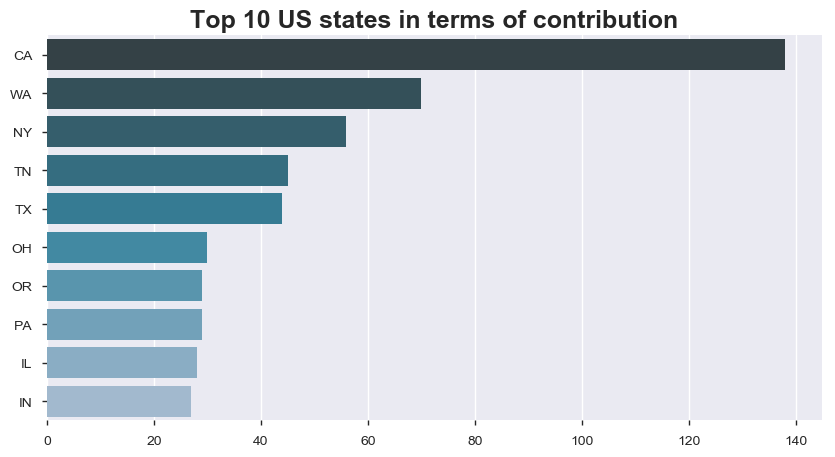

In [97]:
usa = mh.loc[mh['country'] == 'United States']
top_10_statesUS = usa['state'].value_counts()[:10].to_frame()
plt.figure(figsize=(10,5))
sns.barplot(top_10_statesUS['state'],top_10_statesUS.index,palette="PuBuGn_d")
plt.title('Top 10 US states in terms of contribution',fontsize=18,fontweight="bold")
plt.xlabel('')
plt.show()

In [99]:
countries = pd.concat([mh.loc[mh['country']=='Canada'], mh.loc[mh['country']=='United States'], mh.loc[mh['country']=='United Kingdom']]).reset_index(drop=True)
print('There consists {} people from the top 3 countries out of the {} people surveyed'.format(countries.shape[0], mh.shape[0]))

There consists 1007 people from the top 3 countries out of the 1257 people surveyed


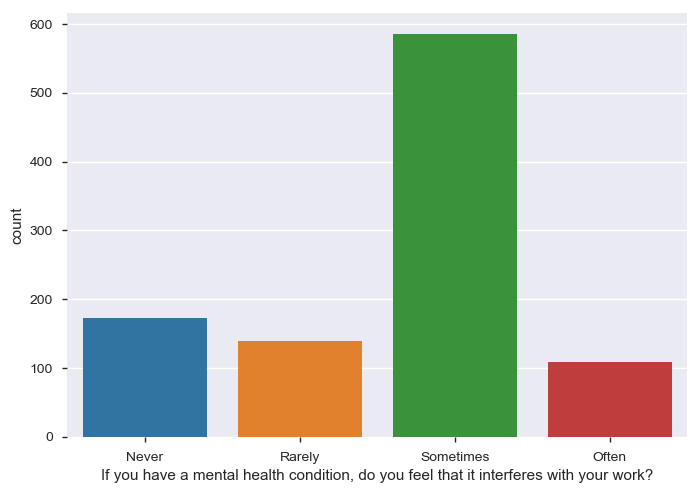

In [100]:
sns.countplot(x=countries['work_interfere'], order=['Never', 'Rarely', 'Sometimes', 'Often']);
plt.xlabel('If you have a mental health condition, do you feel that it interferes with your work?');

In [104]:
work_sum = countries['work_interfere'].value_counts().reset_index()
more_than_never = work_sum['work_interfere'][0] + work_sum['work_interfere'][2] + work_sum['work_interfere'][3]
print('{} people, or {:.1%}, believe that their mental health condition interferes with their work either sometimes or more'.format(more_than_never, more_than_never/countries.shape[0]))
print('With {} ({:.1%}) people saying it intereferes often'.format(work_sum['work_interfere'][3], work_sum['work_interfere'][3]/countries.shape[0]))

834 people, or 82.8%, believe that their mental health condition interferes with their work either sometimes or more
With 109 (10.8%) people saying it intereferes often


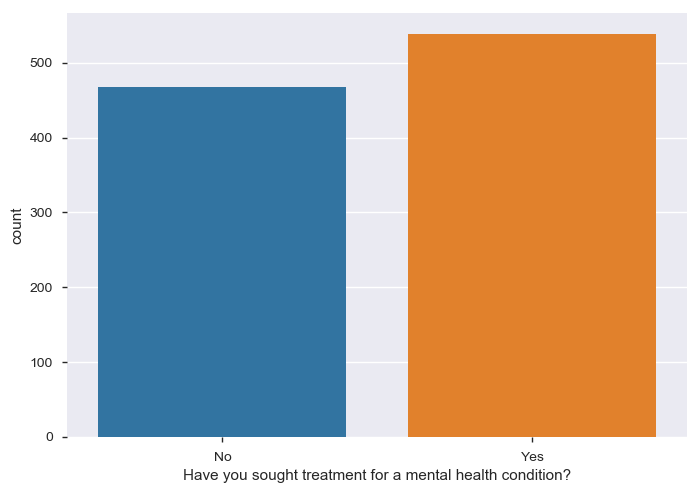

In [105]:
sns.countplot(countries['treatment']);
plt.xlabel('Have you sought treatment for a mental health condition?');

In [106]:
treatment_count = countries['treatment'].value_counts().reset_index()
print('Luckily {} ({:.1%}) have sought treatment for their mental health issues'.format(treatment_count['treatment'][0], treatment_count['treatment'][0]/countries.shape[0]))

Luckily 539 (53.5%) have sought treatment for their mental health issues


In [107]:
male = countries.loc[countries['gender']=='male']
male_treatment = male.loc[male['treatment']=='Yes'].reset_index(drop=True)

female = countries.loc[countries['gender']=='female']
female_treatment = female.loc[female['treatment']=='Yes'].reset_index(drop=True)

trans = countries.loc[countries['gender']=='trans']
trans_treatment = trans.loc[trans['treatment']=='Yes'].reset_index(drop=True)

print('Out of {} males surveyed, {} ({:.1%}) sought treatment'.format(male.shape[0], male_treatment.shape[0], male_treatment.shape[0]/male.shape[0]))
print('Out of {} females surveyed, {} ({:.1%}) sought treatment'.format(female.shape[0], female_treatment.shape[0], female_treatment.shape[0]/female.shape[0]))
print('Out of {} people who identify as anything other than male or female surveyed, {} ({:.1%}) sought treatment'.format(trans.shape[0], trans_treatment.shape[0], trans_treatment.shape[0]/trans.shape[0] ))

Out of 772 males surveyed, 371 (48.1%) sought treatment
Out of 218 females surveyed, 155 (71.1%) sought treatment
Out of 15 people who identify as anything other than male or female surveyed, 12 (80.0%) sought treatment


col_0      count
attitudes       
Moderate     477
Negative     290
Positive     490
If we didn't miss anything, this will equal 1257: 1257
AxesSubplot(0.125,0.11;0.775x0.77)


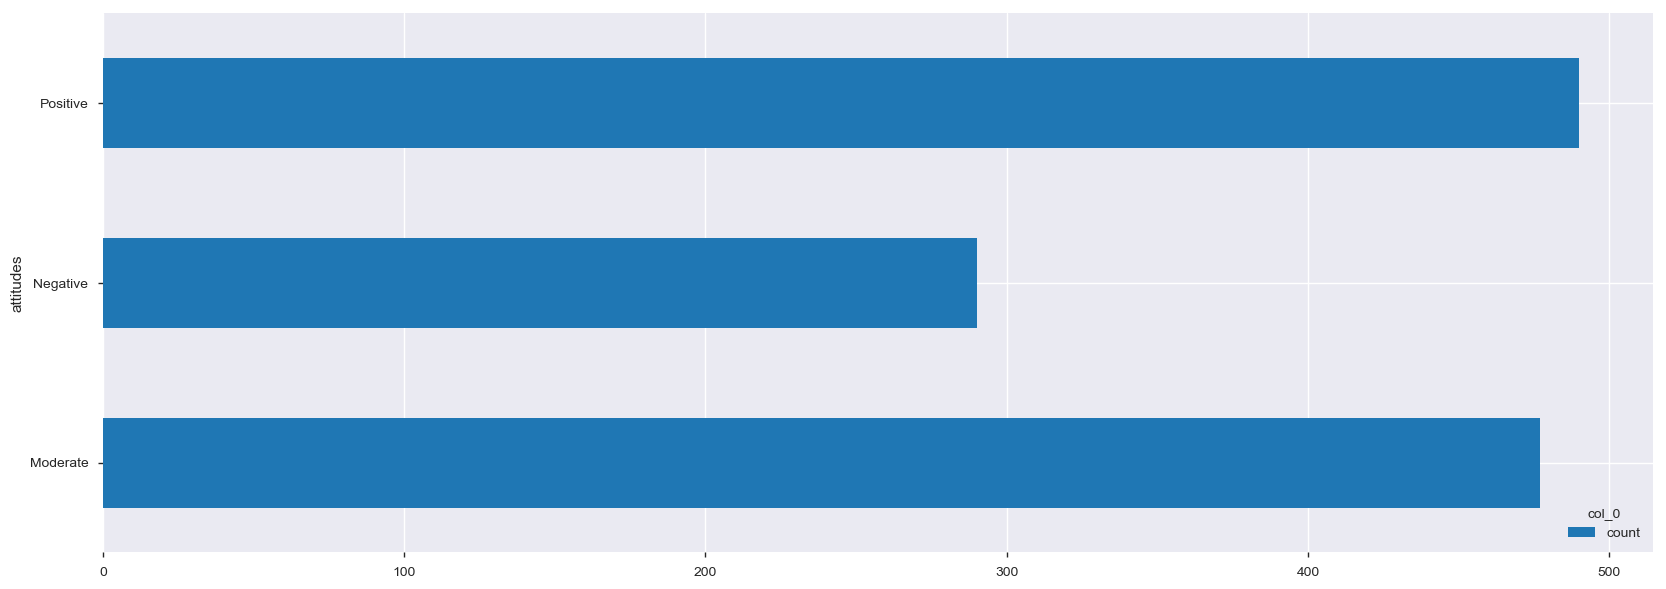

In [108]:
mh['attitudes'] = mh['mental_health_consequence']                                                        # Make a copy of the column to preserve the original data. Work with the new column going forward.

positive = ["No"]                                                                                        # Assign each type of response to one of two categories
negative = ["Yes"]
moderate = ['Maybe']

mh['attitudes'] = mh['attitudes'].apply(lambda x:"Positive" if x in positive else x)
mh['attitudes'] = mh['attitudes'].apply(lambda x:"Negative" if x in negative else x)
mh['attitudes'] = mh['attitudes'].apply(lambda x:"Moderate" if x in moderate else x)


attitudes_tab = pd.crosstab(index=mh["attitudes"], columns="count")                                      # Make a crosstab to view the count for each of the new categories

print(attitudes_tab)

print("If we didn't miss anything, this will equal 1257:", len(mh['attitudes']))                         # Confirm that we didn't miss any entries

print(attitudes_tab.plot(kind="barh", 
                 figsize=(20,7),
                 stacked=True))